# Answer following questions

1.为什么我们需要机器学习方法而不是创建复杂的公式？
答：机器学习最直接的应用，就是利用模型解决实际业务中的问题。学会这些模型，一则可以以它们为载体理解“机器学习”是一种怎样的机制；
二则掌握了模型，也就掌握了当前许多实际问题的有效解决方案；三则通过让计算机从数据种进行自动学习，得到某种知识或规律。
创建复杂的公式更偏向于底层理论研究。

2.在我们的课程中，“第一次随机选择”方法的缺点是什么？
答：其缺点是收敛的较慢，loss值为$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}$$，理论上trying_times越大，loss值越来越小，趋近于零，
则拟合的越好。但是trying_times越大，时间消耗更大。

3.第二种方法监督方向比第一方更好吗？ “第二次监督方向”方法的缺点是什么？
答：是的，更好，第二种方法中当loss值没有变小时，则调整方向，加快了收敛速度，时间消耗相比第一种更小。
缺点是其有四个监督方向，当loss值变小时，则继续朝着这个方向变化；当loss值变大，则随机在四个方向种选择一个方向，则方向混乱。

4.为什么我们使用`导数 / 梯度`来拟合目标函数？
答：使用导数 / 梯度能够从任意点开始，在该点对目标函数求导，沿着导数方向（梯度）“走”（下降）一个给定步长，如此循环迭代，直至“走”到导数为0的位置，则达到极小值。能够加快求解，拟合目标函数。

5.用“Gredient Descent”这个词来说，什么是“Gredient”和什么是“Descent”？
答：字面意思时loss值在上下波动中下降收敛。
    在求解机器学习算法的模型参数，即无约束优化问题时，梯度下降（Gradient Descent）是最常采用的方法之一，另一种常用的方法是最小二乘法。
梯度的方向是函数f增长最快的方向，梯度的反方向是梯度下降最快的方向。
算法过程：
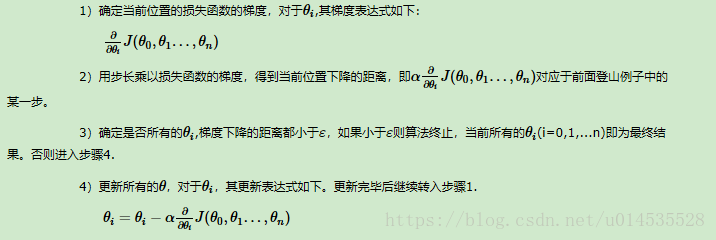
对于梯度下降的解释是：比如说下山的过程中，我们不知道从哪里下山可以最快到达山脚下，这个时候求偏导，也就是求出梯度值，沿着梯度的负方向，
也就是当前位置最陡峭的方向走一步，然后继续求当前位置的梯度，一步一步往下走，就可以到达山脚。

5.1梯度下降找到的一定是下降最快的方向吗？
梯度先将不一定能够找到全局最优解，也可能是一个局部最优解，如果损失函数是凸函数，梯度下降法得到的解一定是全局最优解。
    
5.2什么造成了梯度消失的问题？
sigmoid函数f(x)的导数是f(x)f(1-f(x)),因为f(x)的输出在0-1之间，所以随着深度增加，从顶端传过来的倒数每次乘以两个小于1的数，
很快就会变得特别小，，接近于0，造成梯度消失

6.与先前的方法相比，“第三种梯度下降法”的优点是什么？
答：与先前的方法相比，第三种梯度下降法能够实现每一步指导其方向朝哪个方向变化，能够确保loss值不断的减小，加快收敛速度。

7.用简单的词语来描述：什么是机器学习？
答：通俗的讲，机器学习就是让计算机从数据种进行自动学习，得到某种知识或规律。作为一门学科，机器学习通常指一类问题以及解决这类问题的方法，即如何
从观测数据（样本）中寻找规律，并利用学习到的规律（模型）对未知或无法观测的数据进行预测。


# 搜索策略与机器学习初步

In [1]:
import re
import numpy
import networkx as nx
import matplotlib.pyplot as plt
import math

In [2]:
%matplotlib inline

In [3]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [4]:
city_location = {'香港':(114.17,22.28)}

In [5]:
test_string = "{name:'兰州', geoCoord:[103.73, 36.03]}"

In [6]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

“\s+”则表示匹配任意多个上面的字符
[\s]表示，只要出现空白就匹配
[\S]表示，非空白就匹配

In [7]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info:
        continue
    #print(city_info[0])
    city,long,lat = city_info[0]
    long,lat = float(long),float(lat)
    #转为字典
    city_location[city] = (long,lat)


In [8]:
city_location

{'上海': (121.48, 31.22),
 '乌鲁木齐': (87.68, 43.77),
 '兰州': (103.73, 36.03),
 '北京': (116.46, 39.92),
 '南京': (118.78, 32.04),
 '南宁': (108.33, 22.84),
 '南昌': (115.89, 28.68),
 '台湾': (121.3, 25.03),
 '合肥': (117.27, 31.86),
 '呼和浩特': (111.65, 40.82),
 '哈尔滨': (126.63, 45.75),
 '嘉峪关': (98.17, 39.47),
 '天津': (117.2, 39.13),
 '太原': (112.53, 37.87),
 '广州': (113.23, 23.16),
 '成都': (104.06, 30.67),
 '拉萨': (102.73, 25.04),
 '杭州': (120.19, 30.26),
 '武汉': (114.31, 30.52),
 '沈阳': (123.38, 41.8),
 '济南': (117.0, 36.65),
 '海口': (110.35, 20.02),
 '澳门': (113.54, 22.19),
 '石家庄': (114.48, 38.03),
 '福州': (119.3, 26.08),
 '西宁': (101.74, 36.56),
 '西安': (108.95, 34.27),
 '西藏': (91.11, 29.97),
 '贵阳': (106.71, 26.57),
 '郑州': (113.65, 34.76),
 '重庆': (106.54, 29.59),
 '银川': (106.27, 38.47),
 '长春': (125.35, 43.88),
 '长沙': (113.0, 28.21),
 '香港': (114.17, 22.28)}

In [9]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.根据经度纬度计算直线距离

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [10]:
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [11]:
get_geo_distance('上海','杭州')

153.5185697155768

In [12]:
city_graph = nx.Graph()

In [13]:
city_graph.add_nodes_from(list(city_location.keys()))

In [14]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 

matplotlib.rcParams['font.family']='sans-serif'

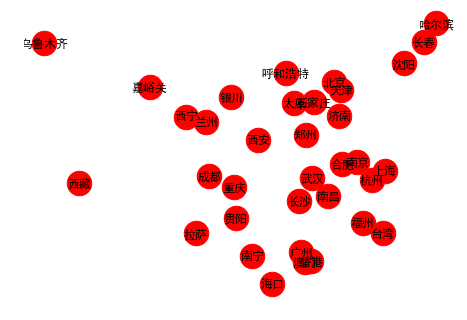

In [15]:
nx.draw(city_graph,city_location,with_labels=True,node_size=600)

In [16]:
threshold = 300

In [17]:
from collections import defaultdict
city_connection = defaultdict(list)

In [18]:
city_connection

defaultdict(list, {})

In [19]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2:
            continue
        distance = get_geo_distance(c1,c2)
        
        if distance < threshold:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)
        

In [23]:
city_connection

defaultdict(list,
            {'上海': ['杭州', '杭州'],
             '兰州': ['西宁', '成都', '银川', '西宁', '成都', '银川'],
             '北京': ['石家庄', '济南', '石家庄', '济南', '天津', '天津'],
             '南京': ['合肥', '杭州', '合肥', '杭州'],
             '南宁': ['贵阳', '海口', '贵阳', '海口'],
             '南昌': ['武汉', '合肥', '武汉', '合肥'],
             '台湾': ['福州', '福州'],
             '合肥': ['济南', '南京', '济南', '南京', '南昌', '南昌'],
             '呼和浩特': ['太原', '太原'],
             '哈尔滨': ['长春', '长春'],
             '天津': ['济南', '北京', '济南', '北京'],
             '太原': ['石家庄', '郑州', '石家庄', '郑州', '呼和浩特', '呼和浩特'],
             '广州': ['香港', '香港', '长沙', '澳门', '长沙', '澳门'],
             '成都': ['兰州', '西宁', '兰州', '西宁', '拉萨', '重庆', '拉萨', '重庆'],
             '拉萨': ['西宁', '成都', '西宁', '成都'],
             '杭州': ['南京', '南京', '福州', '上海', '福州', '上海'],
             '武汉': ['郑州', '南昌', '长沙', '郑州', '南昌', '长沙'],
             '沈阳': ['长春', '长春'],
             '济南': ['石家庄', '石家庄', '合肥', '北京', '天津', '合肥', '北京', '天津'],
             '海口': ['南宁', '南宁'],
         

In [24]:
city_with_road = nx.Graph(city_connection)

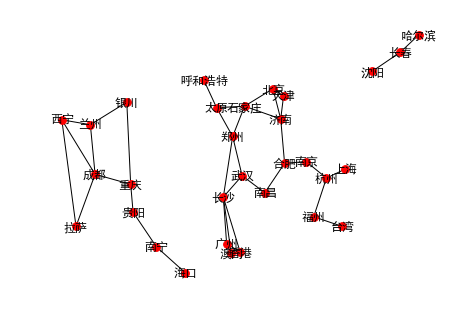

In [47]:
nx.draw(city_with_road, city_location, with_labels=True, node_size=60)

In [48]:
simple_connection_info = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

In [49]:
simple_connection_info_src = defaultdict(list)
simple_connection_info_src

defaultdict(list, {})

In [50]:
simple_connection_info_src.update(simple_connection_info)

In [51]:
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()
    
    while visited:
        froninter = visited.pop() #
        
        if froninter in seen: continue
        
        for successor in graph[froninter]:
            if successor in seen: continue
            print(successor)
            
            #visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first
            visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            
            # 所以说，这个扩展顺序其实是决定了我们的深度优先还是广度优先
    
        seen.add(froninter)
    
    return seen

In [52]:
number_grpah = defaultdict(list)

number_grpah.update({
    1: [2, 3],
    2: [1, 4], 
    3: [1, 5],
    4: [2, 6], 
    5: [3, 7],
    7: [5, 8]
})

In [33]:
bfs(number_grpah, 1)

2
3
4
5
6
7
8


{1, 2, 3, 4, 5, 6, 7, 8}

In [53]:
simple_connection_info['西安']

['兰州', '长沙']

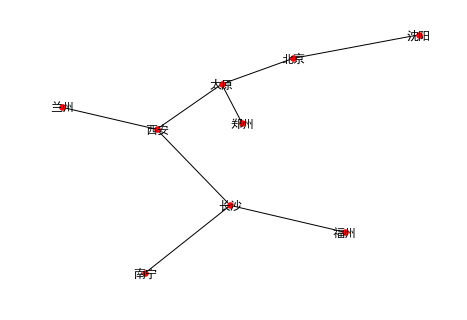

In [54]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=30)

In [55]:
def search(start,destination,connection_grpah,sort_candidate):
    pathes = [[start]]
    
    visitied = set() #去重
    
    while pathes:#当我们发现还有路的时候
        path  = pathes.pop(0) #pop(0)把列表第0个元素拿出来
        froninter = path[-1] #最边缘
        if froninter in visitied:
            continue
        successors = connection_grpah[froninter]
        for city in successors:
            if city in path: 
                continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: 
                return new_path
        
        visitied.add(froninter)
        
       #pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制
            
        
        # 1小时


In [56]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [57]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [58]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for station in path[:-1]:
            distance += get_geo_distance(station, path[-1])
            
        return distance

    return sorted(pathes, key=get_path_distnace)

In [59]:
search('兰州','福州',simple_connection_info,sort_candidate=shortest_path_first)

['兰州', '西安', '长沙', '福州']

In [60]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [77]:
pretty_print(search('北京', '福州', simple_connection_info,sort_candidate=shortest_path_first))

北京🚗->太原🚗->西安🚗->长沙🚗->福州


## Breath first search
## Depth first search

In [75]:
pretty_print(search('北京', '广州', city_connection, sort_candidate=transfer_stations_first))

北京🚗->石家庄🚗->郑州🚗->长沙🚗->广州


In [78]:
pretty_print(search('北京', '广州', city_connection, sort_candidate=transfer_as_much_possible))

北京🚗->石家庄🚗->郑州🚗->长沙🚗->广州


# 杭州地铁1号线与2号线线路

In [63]:
simple_connection_info_test1= {
'湘湖站':['滨康路站'],
'滨康路站':['西兴站','湘湖站'],
'西兴站':['滨和路站','滨康路站'],
'滨和路站':['江陵路站','西兴站'],
'江陵路站':['近江站','滨和路站'],
'近江站':['婺江路站','江陵路站'],
'婺江路站':['城站站','近江站'],
'城站站':['定安路站','婺江路站'],
'定安路站':['龙翔桥站','城站站'],
'龙翔桥站':['凤起路站','定安路站'],
'凤起路站':['武林广场站','龙翔桥站','武林门站','中河北路站'],
'武林广场站':['西湖文化广场站','凤起路站'],
'西湖文化广场站':['打铁关站','武林广场站'],
'打铁关站':['闸弄口站','西湖文化广场站'],
'闸弄口站':['火车东站站','打铁关站'],
'火车东站站':['彭埠站','闸弄口站'],
'彭埠站':['七堡站','火车东站站'],
'七堡站':['九和路站','彭埠站'],
'九和路站':['九堡站','七堡站'],
'九堡站':['客运中心站','九和路站'],
'客运中心站':['下沙西站','九堡站'],
'下沙西站':['金沙湖站','客运中心站'],
'金沙湖站':['高沙路站','下沙西站'],
'高沙路站':['文泽路站','金沙湖站'],
'文泽路站':['文海南路站','高沙路站'],
'文海南路站':['云水站','文泽路站'],
'云水站':['下沙江滨站','文海南路站'],
'下沙江滨站':['滨江一路站','云水站'],
'滨江一路站':['滨江二路站','下沙江滨站'],
'滨江二路站':['南阳大道站','滨江一路站'],
'南阳大道站':['向阳路站','滨江二路站'],
'萧山机场站':['向阳路站'],
'向阳路站':['萧山机场站','南阳大道站'],
'良渚站':['杜甫村站'],
'杜甫村站':['白洋站','良渚站'],
'白洋站':['金家渡站','杜甫村站'],
'金家渡站':['墩祥街站','白洋站'],
'墩祥街站':['三墩站','金家渡站'],
'三墩站':['虾龙圩站','墩祥街站'],
'虾龙圩站':['三坝站','三墩站'],
'三坝站':['文新站','虾龙圩站'],
'文新站':['丰潭路站','三坝站'],
'丰潭路站':['古翠路站','文新站'],
'古翠路站':['学院路站','丰潭路站'],
'学院路站':['下宁桥站','古翠路站'],
'下宁桥站':['沈塘桥站','学院路站'],
'沈塘桥站':['武林门站','下宁桥站'],
'武林门站':['凤起路站','沈塘桥站'],
'凤起路站':['中河北路站','武林门站'],
'中河北路站':['建国北路站','凤起路站'],
'建国北路站':['庆菱路站','中河北路站'],
'庆菱路站':['庆春广场站','建国北路站'],
'庆春广场站':['钱江路站','庆菱路站'],
'钱江路站':['钱江世纪城站','庆春广场站'],
'钱江世纪城站':['盈丰路站','钱江路站'],
'盈丰路站':['飞虹路站','钱江世纪城站'],
'飞虹路站':['振宁路站','盈丰路站'],
'振宁路站':['建设三路站','飞虹路站'],
'建设三路站':['建设一路站','振宁路站'],
'建设一路站':['人民广场站','建设三路站'],
'人民广场站':['杭发厂站','建设一路站'],
'杭发厂站':['人民路站','人民广场站'],
'人民路站':['潘水站','杭发厂站'],
'潘水站':['曹家桥站','人民路站'],
'朝阳站':['曹家桥站'],
'曹家桥站':['朝阳站','潘水站']
    
}

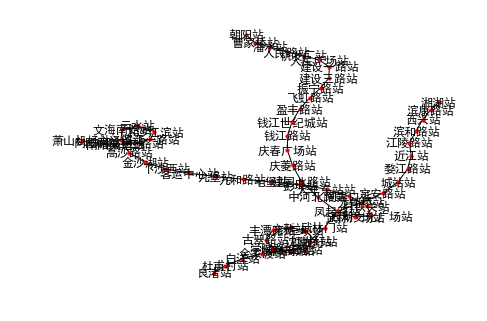

In [64]:
nx.draw(nx.Graph(simple_connection_info_test1),  with_labels=True, node_size=10)

In [69]:
def search_practice(start,destination,connection_grpah):
    pathes = [[start]]
    
    visitied = set() #去重
    
    while pathes:#当我们发现还有路的时候
        path  = pathes.pop(0) #pop(0)把列表第0个元素拿出来
        froninter = path[-1] #最边缘
        if froninter in visitied:
            continue
        successors = connection_grpah[froninter]
        for city in successors:
            if city in path: 
                continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: 
                return new_path
        
        visitied.add(froninter)
        
       #pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制
            
        
        # 1小时


In [70]:
simple_connection_info_test1['火车东站站']

['彭埠站', '闸弄口站']

In [71]:
search_practice('武林广场站','三墩站',simple_connection_info_test1)

['武林广场站',
 '凤起路站',
 '武林门站',
 '沈塘桥站',
 '下宁桥站',
 '学院路站',
 '古翠路站',
 '丰潭路站',
 '文新站',
 '三坝站',
 '虾龙圩站',
 '三墩站']

In [72]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [74]:
pretty_print(search_practice('西湖文化广场站','三墩站',simple_connection_info_test1))

西湖文化广场站🚗->武林广场站🚗->凤起路站🚗->武林门站🚗->沈塘桥站🚗->下宁桥站🚗->学院路站🚗->古翠路站🚗->丰潭路站🚗->文新站🚗->三坝站🚗->虾龙圩站🚗->三墩站


# 杭州地铁运行、在建以及规划站点

In [79]:
simple_connection_info_test2= {
'湘湖站':['滨康路站'],
'滨康路站':['西兴站','湘湖站'],
'西兴站':['滨和路站','滨康路站'],
'滨和路站':['江陵路站','西兴站'],
'江陵路站':['近江站','滨和路站'],
'近江站':['婺江路站','江陵路站','甬江路站','城星路站'],
'婺江路站':['城站站','近江站'],
'城站站':['定安路站','婺江路站'],
'定安路站':['龙翔桥站','城站站'],
'龙翔桥站':['凤起路站','定安路站'],
'凤起路站':['武林广场站','龙翔桥站'],
'武林广场站':['西湖文化广场站','凤起路站','西湖文化广场站','武林门站'],
'西湖文化广场站':['打铁关站','武林广场站','潮王路站','武林广场站'],
'打铁关站':['闸弄口站','西湖文化广场站'],
'闸弄口站':['火车东站站','打铁关站'],
'火车东站站':['彭埠站','闸弄口站'],
'彭埠站':['七堡站','火车东站站','火车东站站','明石路站'],
'七堡站':['九和路站','彭埠站'],
'九和路站':['九堡站','七堡站'],
'九堡站':['客运中心站','九和路站'],
'客运中心站':['下沙西站','九堡站'],
'下沙西站':['金沙湖站','客运中心站'],
'金沙湖站':['高沙路站','下沙西站'],
'高沙路站':['文泽路站','金沙湖站'],
'文泽路站':['文海南路站','高沙路站'],
'文海南路站':['云水站','文泽路站'],
'云水站':['下沙江滨站','文海南路站'],
'下沙江滨站':['滨江一路站','云水站'],
'滨江一路站':['滨江二路站','下沙江滨站'],
'滨江二路站':['南阳大道站','滨江一路站'],
'南阳大道站':['向阳路站','滨江二路站'],
'萧山机场站':['向阳路站','靖江站'],
'向阳路站':['萧山机场站','南阳大道站'],
'良渚站':['杜甫村站'],
'杜甫村站':['白洋站','良渚站'],
'白洋站':['金家渡站','杜甫村站'],
'金家渡站':['墩祥街站','白洋站','勾阳路站','紫金港路站'],
'墩祥街站':['三墩站','金家渡站'],
'三墩站':['虾龙圩站','墩祥街站'],
'虾龙圩站':['三坝站','三墩站'],
'三坝站':['文新站','虾龙圩站'],
'文新站':['丰潭路站','三坝站'],
'丰潭路站':['古翠路站','文新站'],
'古翠路站':['学院路站','丰潭路站'],
'学院路站':['下宁桥站','古翠路站'],
'下宁桥站':['沈塘桥站','学院路站'],
'沈塘桥站':['武林门站','下宁桥站'],
'武林门站':['凤起路站','沈塘桥站','武林广场站','松木场站'],
'凤起路站':['中河北路站','武林门站'],
'中河北路站':['建国北路站','凤起路站'],
'建国北路站':['庆菱路站','中河北路站'],
'庆菱路站':['庆春广场站','建国北路站'],
'庆春广场站':['钱江路站','庆菱路站'],
'钱江路站':['钱江世纪城站','庆春广场站'],
'钱江世纪城站':['盈丰路站','钱江路站'],
'盈丰路站':['飞虹路站','钱江世纪城站'],
'飞虹路站':['振宁路站','盈丰路站'],
'振宁路站':['建设三路站','飞虹路站'],
'建设三路站':['建设一路站','振宁路站'],
'建设一路站':['人民广场站','建设三路站'],
'人民广场站':['杭发厂站','建设一路站'],
'杭发厂站':['人民路站','人民广场站'],
'人民路站':['潘水站','杭发厂站'],
'潘水站':['曹家桥站','人民路站'],
'朝阳站':['曹家桥站'],
'曹家桥站':['朝阳站','潘水站'],
'仓前新城站':['留祥路站'],
'留祥路站':['火车西站站','仓前新城站'],
'火车西站站':['仓兴路站','留祥路站'],
'仓兴路站':['文一西路站','火车西站站'],
'文一西路站':['绿汀路站','仓兴路站'],
'绿汀路站':['创远路站','文一西路站'],
'创远路站':['良睦路站','绿汀路站'],
'良睦路站':['高教路站','创远路站'],
'高教路站':['联胜路站','良睦路站'],
'联胜路站':['访溪路站','高教路站'],
'访溪路站':['百家园路站','联胜路站'],
'百家园路站':['花坞路站','访溪路站'],
'花坞路站':['汽车西站','百家园路站'],
'汽车西站':['古墩路站','花坞路站'],
'古墩路站':['古荡新村站','汽车西站'],
'古荡新村站':['古荡站','古墩路站'],
'古荡站':['玉古路站','古荡新村站'],
'玉古路站':['松木场站','古荡站'],
'松木场站':['武林门站','玉古路站'],
'武林门站':['武林广场站','松木场站'],
'武林广场站':['西湖文化广场站','武林门站'],
'西湖文化广场站':['潮王路站','武林广场站'],
'潮王路站':['香积寺路站','西湖文化广场站'],
'香积寺路站':['大关北站','潮王路站'],
'大关北站':['沈半路站','香积寺路站'],
'沈半路站':['新天地站','大关北站'],
'新天地站':['北景园站','沈半路站'],
'北景园站':['华丰站','新天地站'],
'华丰站':['建塘站','北景园站'],
'建塘站':['丁兰站','华丰站'],
'丁兰站':['长睦站','建塘站'],
'长睦站':['三义站','丁兰站'],
'三义站':['天都城站','长睦站'],
'天都城站':['星桥站','三义站'],
'星桥站':['星河南路站','天都城站'],
'星河南路站':['临平站','星桥站'],
'临平站':['人民广场站','星河南路站'],
'人民广场站':['汽车北站','临平站'],
'北沙东路站':['汽车北站'],
'汽车北站':['北沙东路站','人民广场站'],
    
'紫金港路站':['金家渡站'],
'金家渡站':['勾阳路站','紫金港路站'],
'勾阳路站':['杭行路站','金家渡站'],
'杭行路站':['储运路站','勾阳路站'],
'储运路站':['拱康路站','杭行路站'],
'拱康路站':['杭钢站','储运路站'],
'杭钢站':['桃源站','拱康路站'],
'桃源站':['桃源街站','杭钢站'],
'桃源街站':['长浜廊路站','桃源站'],
'长浜廊路站':['东新东路站','桃源街站'],
'东新东路站':['华中路站','长浜廊路站'],
'华中路站':['机场路站','东新东路站'],
'机场路站':['笕新路站','华中路站'],
'笕新路站':['明石路站','机场路站'],
'明石路站':['彭埠站','笕新路站'],
'彭埠站':['火车东站站','明石路站'],
'火车东站站':['新风站','彭埠站'],
'新风站':['新塘站','火车东站站'],
'新塘站':['景芳站','新风站'],
'景芳站':['钱江路站','新塘站'],
'钱江路站':['江锦路站','景芳站'],
'江锦路站':['市民中心站','钱江路站'],
'市民中心站':['城星路站','江锦路站'],
'城星路站':['近江站','市民中心站'],
'近江站':['甬江路站','城星路站'],
'甬江路站':['南星桥站','近江站'],
'南星桥站':['复兴路站','甬江路站'],
'复兴路站':['水澄桥站','南星桥站'],
'水澄桥站':['联庄站','复兴路站'],
'联庄站':['中医药大学站','水澄桥站'],
'中医药大学站':['杨家墩站','联庄站'],
'浦沿站':['杨家墩站'],
'杨家墩站':['浦沿站','中医药大学站']
}

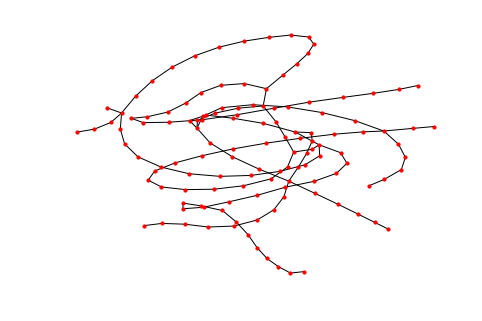

In [80]:
nx.draw(nx.Graph(simple_connection_info_test2),  with_label=True, node_size=10)

In [81]:
search_practice('花坞路站','汽车北站',simple_connection_info_test2)

['花坞路站',
 '汽车西站',
 '古墩路站',
 '古荡新村站',
 '古荡站',
 '玉古路站',
 '松木场站',
 '武林门站',
 '武林广场站',
 '西湖文化广场站',
 '潮王路站',
 '香积寺路站',
 '大关北站',
 '沈半路站',
 '新天地站',
 '北景园站',
 '华丰站',
 '建塘站',
 '丁兰站',
 '长睦站',
 '三义站',
 '天都城站',
 '星桥站',
 '星河南路站',
 '临平站',
 '人民广场站',
 '汽车北站']

In [82]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [83]:
pretty_print(search_practice('湘湖站','杨家墩站',simple_connection_info_test2))

湘湖站🚗->滨康路站🚗->西兴站🚗->滨和路站🚗->江陵路站🚗->近江站🚗->甬江路站🚗->南星桥站🚗->复兴路站🚗->水澄桥站🚗->联庄站🚗->中医药大学站🚗->杨家墩站


In [84]:
pretty_print(search_practice('湘湖站','紫金港路站',simple_connection_info_test2))

湘湖站🚗->滨康路站🚗->西兴站🚗->滨和路站🚗->江陵路站🚗->近江站🚗->城星路站🚗->市民中心站🚗->江锦路站🚗->钱江路站🚗->景芳站🚗->新塘站🚗->新风站🚗->火车东站站🚗->彭埠站🚗->明石路站🚗->笕新路站🚗->机场路站🚗->华中路站🚗->东新东路站🚗->长浜廊路站🚗->桃源街站🚗->桃源站🚗->杭钢站🚗->拱康路站🚗->储运路站🚗->杭行路站🚗->勾阳路站🚗->金家渡站🚗->紫金港路站


In [85]:
pretty_print(search_practice('龙翔桥站','火车东站站',simple_connection_info_test2))

龙翔桥站🚗->凤起路站🚗->中河北路站🚗->建国北路站🚗->庆菱路站🚗->庆春广场站🚗->钱江路站🚗->景芳站🚗->新塘站🚗->新风站🚗->火车东站站


In [86]:
pretty_print(search_practice('湘湖站','火车东站站',simple_connection_info_test2))

湘湖站🚗->滨康路站🚗->西兴站🚗->滨和路站🚗->江陵路站🚗->近江站🚗->城星路站🚗->市民中心站🚗->江锦路站🚗->钱江路站🚗->景芳站🚗->新塘站🚗->新风站🚗->火车东站站


# Machine Learning
boson房价预测

In [88]:
from sklearn.datasets import load_boston

In [89]:
data = load_boston()

In [141]:
X, y = data['data'], data['target']

In [142]:
X[1]

array([  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
         0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
         7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
         2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
         9.14000000e+00])

In [143]:
y[1]

21.600000000000001

In [133]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [144]:
data['DESCR']

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [145]:
#所有犯罪率CRIM
X[:, 0]

array([  6.32000000e-03,   2.73100000e-02,   2.72900000e-02,
         3.23700000e-02,   6.90500000e-02,   2.98500000e-02,
         8.82900000e-02,   1.44550000e-01,   2.11240000e-01,
         1.70040000e-01,   2.24890000e-01,   1.17470000e-01,
         9.37800000e-02,   6.29760000e-01,   6.37960000e-01,
         6.27390000e-01,   1.05393000e+00,   7.84200000e-01,
         8.02710000e-01,   7.25800000e-01,   1.25179000e+00,
         8.52040000e-01,   1.23247000e+00,   9.88430000e-01,
         7.50260000e-01,   8.40540000e-01,   6.71910000e-01,
         9.55770000e-01,   7.72990000e-01,   1.00245000e+00,
         1.13081000e+00,   1.35472000e+00,   1.38799000e+00,
         1.15172000e+00,   1.61282000e+00,   6.41700000e-02,
         9.74400000e-02,   8.01400000e-02,   1.75050000e-01,
         2.76300000e-02,   3.35900000e-02,   1.27440000e-01,
         1.41500000e-01,   1.59360000e-01,   1.22690000e-01,
         1.71420000e-01,   1.88360000e-01,   2.29270000e-01,
         2.53870000e-01,

In [146]:
len(X[:, 0])

506

In [147]:
len(y)

506

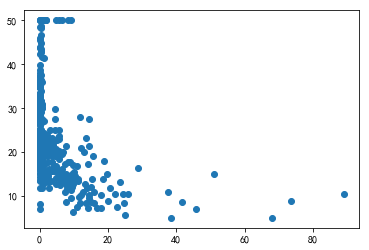

In [148]:
#犯罪率与房屋价格关系
plt.scatter(X[:, 0], y)

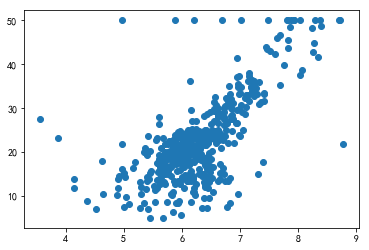

In [149]:
plt.scatter(X[:, 5], y)

In [150]:
#房屋数量与价格关系
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

In [151]:
import random

In [152]:
#随机定义一个函数
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b

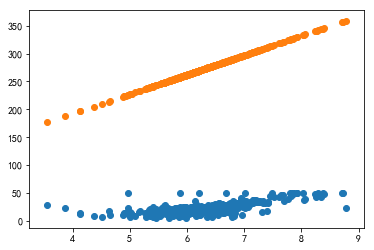

In [153]:
#随机生成一个k,b，怎么评价生成的线性函数更好呢？
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

In [154]:
len(list(y))

506

In [155]:
list(y)

[24.0,
 21.600000000000001,
 34.700000000000003,
 33.399999999999999,
 36.200000000000003,
 28.699999999999999,
 22.899999999999999,
 27.100000000000001,
 16.5,
 18.899999999999999,
 15.0,
 18.899999999999999,
 21.699999999999999,
 20.399999999999999,
 18.199999999999999,
 19.899999999999999,
 23.100000000000001,
 17.5,
 20.199999999999999,
 18.199999999999999,
 13.6,
 19.600000000000001,
 15.199999999999999,
 14.5,
 15.6,
 13.9,
 16.600000000000001,
 14.800000000000001,
 18.399999999999999,
 21.0,
 12.699999999999999,
 14.5,
 13.199999999999999,
 13.1,
 13.5,
 18.899999999999999,
 20.0,
 21.0,
 24.699999999999999,
 30.800000000000001,
 34.899999999999999,
 26.600000000000001,
 25.300000000000001,
 24.699999999999999,
 21.199999999999999,
 19.300000000000001,
 20.0,
 16.600000000000001,
 14.4,
 19.399999999999999,
 19.699999999999999,
 20.5,
 25.0,
 23.399999999999999,
 18.899999999999999,
 35.399999999999999,
 24.699999999999999,
 31.600000000000001,
 23.300000000000001,
 19.600000000

In [156]:
price_by_random_k_and_b

[282.125,
 276.73500000000001,
 303.47500000000002,
 296.93000000000001,
 302.14499999999998,
 277.04999999999995,
 262.41999999999996,
 268.01999999999998,
 249.08500000000001,
 262.13999999999999,
 275.19499999999999,
 262.315,
 258.11500000000001,
 260.21500000000003,
 265.36000000000001,
 256.19,
 259.72500000000002,
 261.64999999999998,
 242.96000000000001,
 252.44500000000002,
 246.95000000000002,
 260.77499999999998,
 266.97000000000003,
 255.45499999999998,
 259.34000000000003,
 247.965,
 255.45499999999998,
 263.64499999999998,
 279.32500000000005,
 285.59000000000003,
 251.95500000000001,
 264.51999999999998,
 260.25,
 251.535,
 265.36000000000001,
 259.65499999999997,
 256.435,
 256.75,
 260.81,
 282.82499999999999,
 297.84000000000003,
 288.94999999999999,
 267.91499999999996,
 269.38499999999999,
 264.41499999999996,
 250.87,
 254.50999999999999,
 263.05000000000001,
 240.965,
 248.07000000000002,
 260.70500000000004,
 266.02499999999998,
 279.88499999999999,
 261.93000000

损失值loss

In [157]:
[1,1,1]
[2,2,2]

[2, 2, 2]

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}$$

In [158]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [159]:
loss([1,1,1],[2,2,3])

2.0

In [160]:
loss([1,1,1],[2,2,1])

0.6666666666666666

# 1nd-Method: Random generation: get best k and best b
#找到最好的k和b

In [161]:
random.random()  #值域[0,1]

0.6875979384140612

In [162]:
X_rm = X[:, 5]

In [163]:
trying_times = 2000

min_loss = float('inf') #正负无穷
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 74.67946283309692 best_b: -96.15884455091381, and the loss is: 125111.82178140874
When time is : 1, get best_k: -15.760895123181086 best_b: 89.28015932250943, and the loss is: 1391.725000715205
When time is : 4, get best_k: 20.71432770556048 best_b: -83.84057837528466, and the loss is: 676.8863897777655
When time is : 45, get best_k: 15.280404616260896 best_b: -85.03247098628263, and the loss is: 195.42949368677472
When time is : 75, get best_k: -6.209636053432433 best_b: 65.4814573692365, and the loss is: 174.5054606289651
When time is : 354, get best_k: 13.869938370629768 best_b: -61.88821602786938, and the loss is: 62.34369004788225
When time is : 782, get best_k: 10.98652273534799 best_b: -45.629214488438485, and the loss is: 46.132031770364115


In [164]:
#46开根号
46**0.5

6.782329983125268

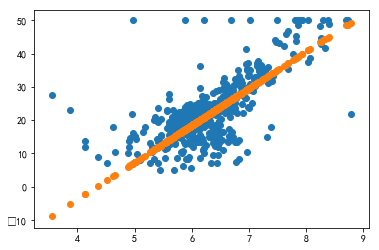

In [166]:
X_rm = X[:, 5]
k = 11.129322058515797
b = -48.38979236697012
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

理论上trying_times越大，loss值越来越小，趋近于零，则拟合的越好。但是trying_times越大，时间消耗更大。怎么让它时间消耗更小呢

# 2nd-Method: Direction Adjusting
当loss值没有变小时，则调整方向

如果我们想得到更快的更新，在更短的时间内获得更好的结果，我们需要一件事情：

#### 找对改变的方向

#### 如何找对改变的方向呢？ 

# 2nd-method: 监督让他变化--> 监督学习

In [167]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1
update_time = 0

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        update_time += 1
        
        if update_time % 10 == 0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)  #随机选择方向

When time is : 14, get best_k: -33.233943048677034 best_b: -81.65214053569684, and the loss is: 98925.80908792988
When time is : 24, get best_k: -32.23394304867702 best_b: -80.6521405356969, and the loss is: 94376.76782195512
When time is : 34, get best_k: -31.233943048677006 best_b: -79.65214053569696, and the loss is: 89934.84374272736
When time is : 44, get best_k: -30.23394304867699 best_b: -78.65214053569701, and the loss is: 85600.03685024659
When time is : 54, get best_k: -29.233943048676977 best_b: -77.65214053569707, and the loss is: 81372.3471445129
When time is : 64, get best_k: -28.233943048676963 best_b: -76.65214053569713, and the loss is: 77251.77462552616
When time is : 74, get best_k: -27.23394304867695 best_b: -75.65214053569719, and the loss is: 73238.31929328667
When time is : 84, get best_k: -26.233943048676934 best_b: -74.65214053569724, and the loss is: 69331.98114779397
When time is : 94, get best_k: -25.23394304867692 best_b: -73.6521405356973, and the loss is:

#### 导数

# 3nd-method: Gradient Descent获得最佳* k *和* b *

In [168]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [122]:
from icecream import ic

In [169]:
trying_times = 2000

X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04


update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: 9.766056951323153 best_b: -38.652140535697484, and the loss is: 228695.2292844718
When time is : 50, get best_k: 9.766056951323153 best_b: -38.652140535697484, and the loss is: 100466.03267040293
When time is : 100, get best_k: 9.766056951323153 best_b: -38.652140535697484, and the loss is: 44154.65820624045
When time is : 150, get best_k: 9.766056951323153 best_b: -38.652140535697484, and the loss is: 19425.72621095427
When time is : 200, get best_k: 9.766056951323153 best_b: -38.652140535697484, and the loss is: 8566.105639563142
When time is : 250, get best_k: 9.766056951323153 best_b: -38.652140535697484, and the loss is: 3797.141279252836
When time is : 300, get best_k: 9.766056951323153 best_b: -38.652140535697484, and the loss is: 1702.865802384472
When time is : 350, get best_k: 9.766056951323153 best_b: -38.652140535697484, and the loss is: 783.1699401638128
When time is : 400, get best_k: 9.766056951323153 best_b: -38.652140535697484, and the los

In [ ]:
y = 10

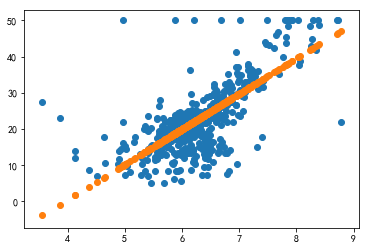

In [170]:
X_rm = X[:, 5]
k = 9.766056951323153 
b = -38.652140535697484
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

 4nd-method: 尝试不同的损失函数和学习率